# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    params = {
        "q": city,
        "appid": weather_api_key,
        "units": "metric"  # You can change units to imperial for Fahrenheit
    }

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lerwick
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | christchurch
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | sault ste. marie
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | aral
Processing Record 9 of Set 1 | qarqaraly
Processing Record 10 of Set 1 | prishibinskoye
Processing Record 11 of Set 1 | shingu
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | la'ie
Processing Record 21 of Set 1 | marang
Processing Record 22 of Set 1 | tazovsky
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lerwick,60.1545,-1.1494,10.00,83,100,7.96,GB,1712880872
1,port-aux-francais,-49.3500,70.2167,6.25,91,98,3.93,TF,1712880873
2,christchurch,-43.5333,172.6333,12.40,93,75,9.26,NZ,1712880584
3,bredasdorp,-34.5322,20.0403,12.71,76,5,2.97,ZA,1712880876
4,ribeira grande,38.5167,-28.7000,15.99,94,96,1.79,PT,1712880877


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

#if Output folder is not created previously then can apply 
# import os
# Check if the output directory exists, if not, create it
# output_dir = "output_data"
# if not os.path.exists(output_dir):
    # os.makedirs(output_dir)

# Export the City_Data into a CSV file

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lerwick,60.1545,-1.1494,10.00,83,100,7.96,GB,1712880872
1,port-aux-francais,-49.3500,70.2167,6.25,91,98,3.93,TF,1712880873
2,christchurch,-43.5333,172.6333,12.40,93,75,9.26,NZ,1712880584
3,bredasdorp,-34.5322,20.0403,12.71,76,5,2.97,ZA,1712880876
4,ribeira grande,38.5167,-28.7000,15.99,94,96,1.79,PT,1712880877


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

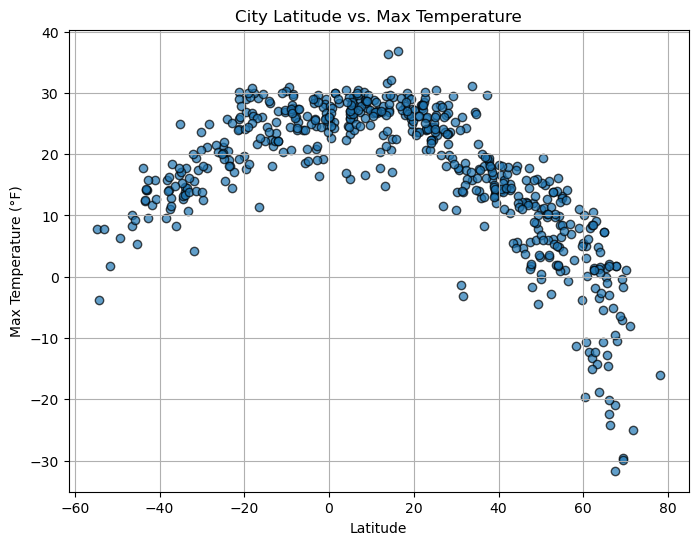

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

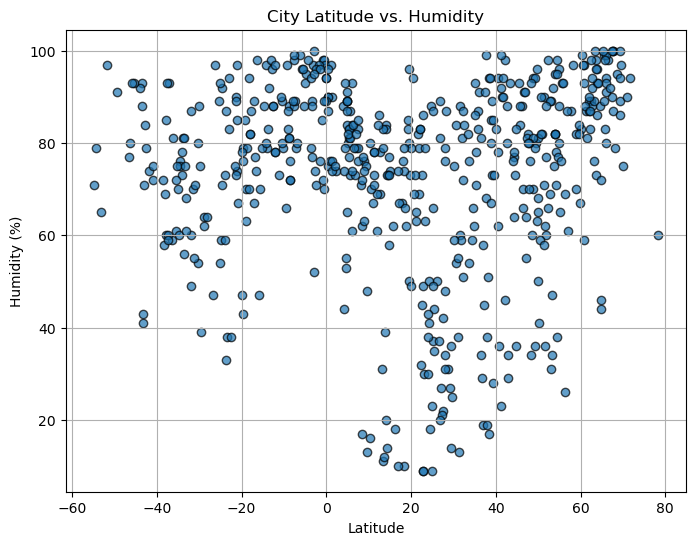

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

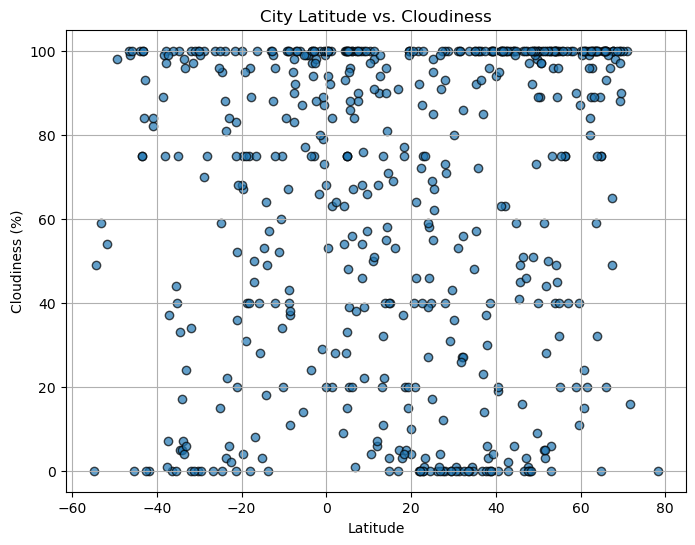

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

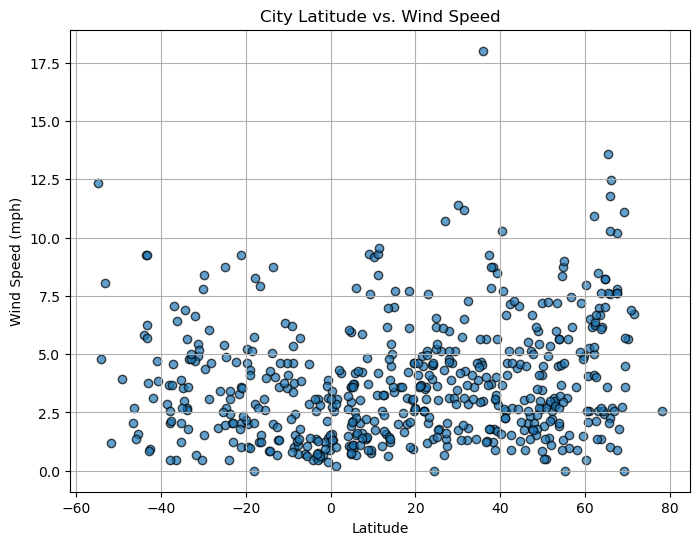

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    
    # Annotate plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.grid(False)
    plt.legend()
    
    # Print correlation coefficient
    print(f"The correlation coefficient (r-value) is: {rvalue}")
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lerwick,60.1545,-1.1494,10.00,83,100,7.96,GB,1712880872
4,ribeira grande,38.5167,-28.7000,15.99,94,96,1.79,PT,1712880877
5,sault ste. marie,46.5168,-84.3333,12.16,66,100,2.06,CA,1712880768
7,aral,40.5156,81.2636,16.65,94,19,3.69,CN,1712880882
8,qarqaraly,49.4058,75.4742,-4.53,80,73,3.01,KZ,1712880882


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.25,91,98,3.93,TF,1712880873
2,christchurch,-43.5333,172.6333,12.40,93,75,9.26,NZ,1712880584
3,bredasdorp,-34.5322,20.0403,12.71,76,5,2.97,ZA,1712880876
6,margaret river,-33.9500,115.0667,13.82,78,5,5.66,AU,1712880703
13,ushuaia,-54.8000,-68.3000,7.81,71,0,12.35,AR,1712880881


###  Temperature vs. Latitude Linear Regression Plot

R squared: -0.8508916974802386


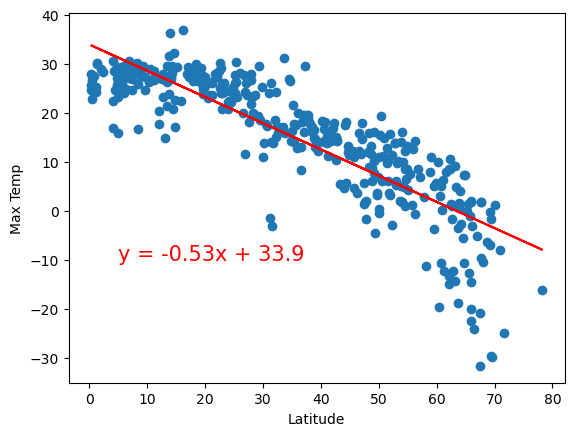

In [15]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)

# Calculate regression values
regress_values = north_lat * slope + intercept

# Create regression equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat, north_temp)

# Plot regression line
plt.plot(north_lat, regress_values, "r-")

# Annotate plot with regression equation
plt.annotate(line_eq, (5, -10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print R-squared value
print(f"R squared: {rvalue}")


R squared: 0.780515096088478


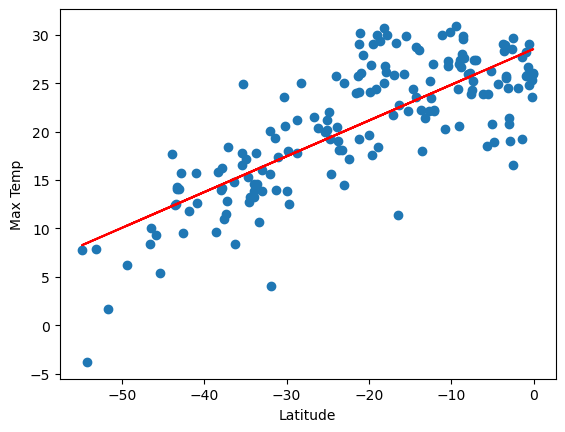

In [16]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)

# Calculate regression values
regress_values = south_lat * slope + intercept

# Create regression equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(south_lat, south_temp)

# Plot regression line
plt.plot(south_lat, regress_values, "r-")

# Annotate plot with regression equation
plt.annotate(line_eq, (-30, 50), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print R-squared value
print(f"R squared: {rvalue}")



**Discussion about the linear relationship:** 
In summary, the linear relationship between latitude and temperature across both hemispheres shows:

Northern Hemisphere: A negative slope indicating temperatures decrease as latitude increases (moving away from the equator towards the pole).

Southern Hemisphere: A positive slope showing temperatures increase as latitude decreases (approaching the equator).

These trends are largely due to how sunlight intensity varies with latitude. The equator receives the most direct sunlight, and sunlight decreases at higher latitudes, leading to cooler temperatures. These relationships are key for understanding climate patterns and predicting changes in weather and climate systems.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.0641006575859595


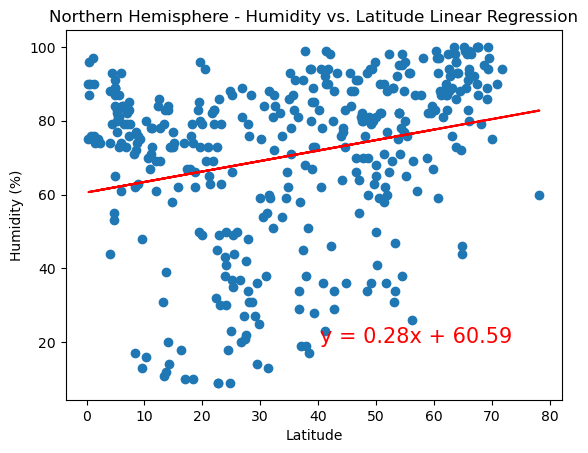

In [17]:

# northern_hemi_df is already defined as the DataFrame for Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_humidity = northern_hemi_df['Humidity']

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)

# Create values for the regression line
regress_values = north_lat * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Create the scatter plot
plt.scatter(north_lat, north_humidity)

# Plot the regression line
plt.plot(north_lat, regress_values, "r-")
plt.annotate(line_eq, (min(north_lat)+40, max(north_humidity)-80), fontsize=15, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r-value
print(f"R squared: {rvalue**2}")

# Show the plot
plt.show()



R squared: 0.12076331122877527


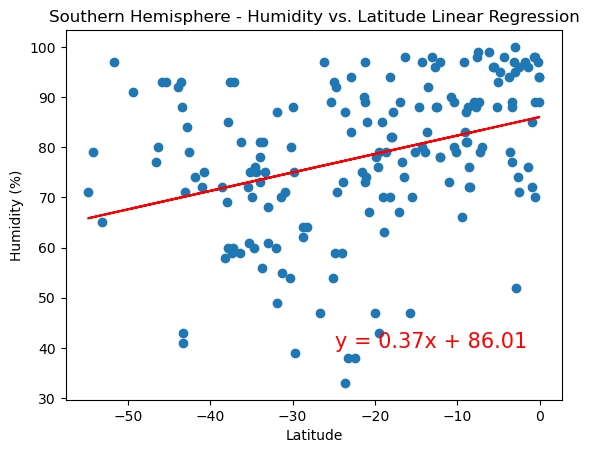

In [18]:

# southern_hemi_df is already defined as the DataFrame for Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_humidity = southern_hemi_df['Humidity']

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)

# Create values for the regression line
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot
plt.scatter(south_lat, south_humidity)

# Plot the regression line
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, (min(south_lat)+30, max(south_humidity)-60), fontsize=15, color="red")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r-value
print(f"R squared: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
In the context of plotting linear regressions for various weather parameters against latitude, the linear relationship indicates how these parameters change with latitude. For example:

**Temperature vs. Latitude:** Typically shows a strong negative correlation in the Northern Hemisphere (temperatures decrease as you move away from the equator) and a positive correlation in the Southern Hemisphere.

**Humidity vs. Latitude:** Might show a weak correlation as humidity can be influenced by other geographical factors beyond latitude, like proximity to bodies of water.

**Wind Speed vs. Latitude:** There may be a slight increase in wind speeds as you move towards higher latitudes due to the increased incidence of cyclonic systems.

These relationships help in understanding the climatic patterns influenced by latitude and can be critical for climate-related studies and predictions.



### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.03


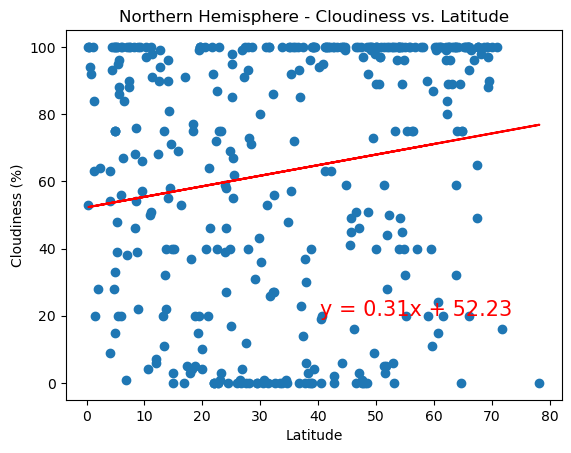

In [19]:
# Northern Hemisphere
# 'city_data_df' is DataFrame and it includes 'Cloudiness' and 'Lat' columns
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Variables for latitude and cloudiness
north_lat = northern_hemisphere_df['Lat']
north_cloudiness = northern_hemisphere_df['Cloudiness']

# Linear regression
slope, intercept, r_value, p_value, stderr = linregress(north_lat, north_cloudiness)
regress_values = north_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot
plt.scatter(north_lat, north_cloudiness)
plt.plot(north_lat, regress_values, "r-")  # Regression line in red
plt.annotate(line_eq, (min(north_lat)+40, min(north_cloudiness)+20), fontsize=15, color="red")

# Plot labels and titles
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Optional: Display R-squared value
print(f"R-squared: {r_value**2:.2f}")

# Show plot
plt.show()

R-squared: 0.03


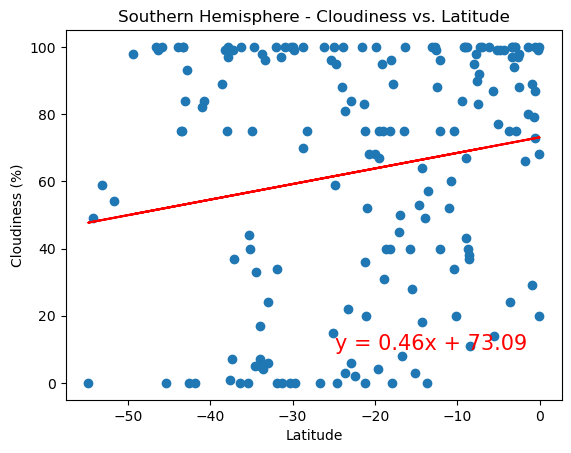

In [20]:

# 'city_data_df' is your DataFrame and includes 'Cloudiness' and 'Lat' columns
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Variables for latitude and cloudiness
south_lat = southern_hemisphere_df['Lat']
south_cloudiness = southern_hemisphere_df['Cloudiness']

# Linear regression
slope, intercept, r_value, p_value, stderr = linregress(south_lat, south_cloudiness)
regress_values = south_lat * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Scatter plot
plt.scatter(south_lat, south_cloudiness)
plt.plot(south_lat, regress_values, "r-")  # Regression line in red
plt.annotate(line_eq, (min(south_lat)+30, min(south_cloudiness)+10), fontsize=15, color="red")

# Plot labels and titles
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Optional: Display R-squared value
print(f"R-squared: {r_value**2:.2f}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
In the Southern Hemisphere, the relationship between cloudiness and latitude is generally weak, indicating that latitude alone isn't a strong predictor of cloudiness in this region.

### Wind Speed vs. Latitude Linear Regression Plot

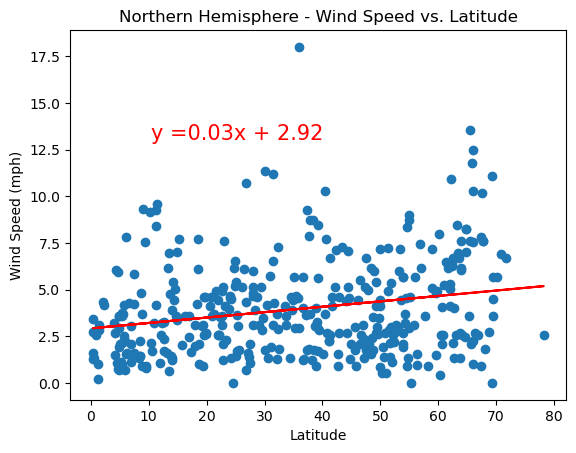

R-squared: 0.05


In [21]:
# Northern Hemisphere
# northern_hemi_df is already defined and contains the Northern Hemisphere data

north_lat = northern_hemi_df['Lat']
north_wind_speed = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(north_lat, north_wind_speed)

# Calculate regression values
regress_values = north_lat * slope + intercept

# Line equation string
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(north_lat, north_wind_speed)

# Plot regression line
plt.plot(north_lat, regress_values, "r-")
plt.annotate(line_eq, (min(north_lat)+10, max(north_wind_speed)-5), fontsize=15, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

# Show plot
plt.show()

# Print R-value
print(f"R-squared: {r_value**2:.2f}")


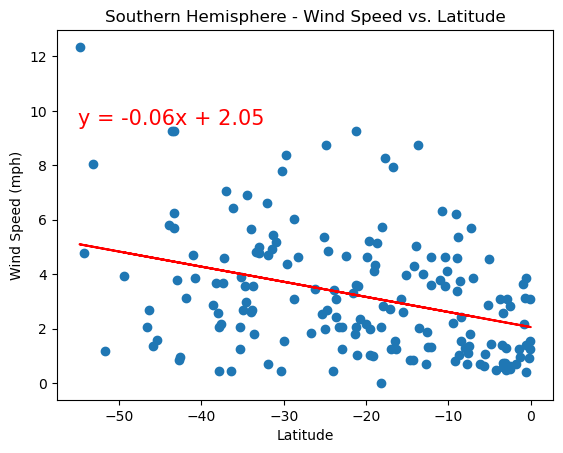

R-squared: 0.12


In [22]:
# Southern Hemisphere

# city_data_df is main DataFrame and it includes 'Lat' and 'Wind Speed'
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Assign data to variables
south_lat = southern_hemi_df['Lat']
south_wind_speed = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(south_lat, south_wind_speed)

# Calculate regression values
regress_values = south_lat * slope + intercept

# Line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create scatter plot
plt.scatter(south_lat, south_wind_speed)

# Plot regression line
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, xy=(-55,9.5), fontsize=15, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')

# Show plot
plt.show()

# Print R-value
print(f"R-squared: {r_value**2:.2f}")

**Discussion about the linear relationship:** 
In the Southern Hemisphere, the linear relationship between wind speed and latitude is generally weak, 
suggesting that latitude alone is not a strong predictor of wind speed in this region. Other factors such 
as local topography, ocean currents, and weather patterns likely play a more significant role in determining wind speed.